# Data Challenge: Covid-19 Dashboard, inforgraohics, comics etc... 

#### AIM: This notebook focuses on analysing the data set on vaccinations of different Health Boards of Scotland. The aim of analysing this data determine vaccination trend across different region, age, gender throughout the population. And in the long run analyse the impact of vaccinations on the battle against Covid-19.

Flow of the notebook:
* Understanding the data
* Cleaning the data
* Deeper exploration of the data
* Reflection and Hypothesis 

#### Understanding the data

In [1]:
import pandas as pd
#dataFrame -> Data for daily vaccinations in Lothian 
HBDaily = pd.read_csv("daily_vacc_hb_20211108.csv")
print(HBDaily)

            Date         HB                  HBName     Sex  \
0       20201208  S08000015  NHS Ayrshire and Arran  Female   
1       20201208  S08000015  NHS Ayrshire and Arran    Male   
2       20201208  S08000015  NHS Ayrshire and Arran   Total   
3       20201208  S08000015  NHS Ayrshire and Arran  Female   
4       20201208  S08000015  NHS Ayrshire and Arran  Female   
...          ...        ...                     ...     ...   
690430  20211107    Unknown                 Unknown   Total   
690431  20211107    Unknown                 Unknown   Total   
690432  20211107    Unknown                 Unknown  Female   
690433  20211107    Unknown                 Unknown    Male   
690434  20211107    Unknown                 Unknown   Total   

                 AgeGroup  Population                Dose  NumberVaccinated  \
0       18 years and over    158178.0              Dose 1               118   
1       18 years and over    141555.0              Dose 1                29   
2     

In [2]:
print('Size of data:',HBDaily.shape)

Size of data: (690435, 11)


Observation: The Dataset has 11 columns with 690435 records.

In [3]:
print('Health boards covered in the data are: \n', HBDaily.HBName.unique())

Health boards covered in the data are: 
 ['NHS Ayrshire and Arran' 'NHS Borders' 'NHS Dumfries and Galloway'
 'NHS Forth Valley' 'NHS Grampian' 'NHS Highland' 'NHS Lothian'
 'NHS Orkney' 'NHS Shetland' 'NHS Western Isles' 'NHS Fife' 'NHS Tayside'
 'NHS Greater Glasgow and Clyde' 'NHS Lanarkshire' 'Scotland' 'Unknown']


Observation: The records cover all the 14 Health Boards of Scotland. However, there are two values that break the pattern:
* Scotland
* Unknown

In [4]:
print('This dataset was colelcted from' , HBDaily.Date.min(), ' to ' , HBDaily.Date.max())

This dataset was colelcted from 20201208  to  20211107


Observation: Interpretting the date in the format yyyymmdd, the data for daily_vacc_hb_20211108.csv was recorded from 08 December 2020 to 07 November 2021.

In [5]:
print("Data types of different fields are as follows:\n", HBDaily.dtypes)

Data types of different fields are as follows:
 Date                            int64
HB                             object
HBName                         object
Sex                            object
AgeGroup                       object
Population                    float64
Dose                           object
NumberVaccinated                int64
PercentCoverage               float64
CumulativeNumberVaccinated      int64
CumulativePercentCoverage     float64
dtype: object


Observation: It can be oberserved that the data from the file daily_vacc_hb_20211108.csv holds 690435 rows x 11 columns that records daily dosage of vaccinations across different region with respect to
* On which date 
* Health Board Number
* Gender of the population vaccinated
* Age group of the population vaccinated
* The total population on that day
* what dosage of vaccination 
* Number of People Vaccinated
* percentage of the population that is vaccinated
* Cumulative Number of people Vaccinated
* Cumulative Percent Covered

Also, it can be observed that:
* this data set is of geographical type with respect to different regions of Scotland. 

In [6]:
print('Doses captured in the data are: \n', HBDaily.Dose.unique())

Doses captured in the data are: 
 ['Dose 1' 'Dose 2' 'Dose 3 and Booster']


Observation: The data set covers vaccination numbers for Doses 1, 2, 3 and Booster.

In [7]:
print('Different age groupings used in the data are: \n', HBDaily.AgeGroup.unique())

Different age groupings used in the data are: 
 ['18 years and over' '12 to 15' '16 to 17' '18 to 29' '30 to 39'
 '40 to 49' '50 to 54' '55 to 59' '60 to 64' '65 to 69' '70 to 74'
 '75 to 79' '80 years and over' '50 years and over' '12 years and over'
 'All vaccinations']


Observation: It is observed that the age grouping is captured in different bandwidths along with some age ranges including:
* 12 years and over - The entire population
* 18 years and over - The adults in the population
* 50 years and over - The elderly of the Population
* 80 years and over - The eldest of the Population
* All vaccinations

In [8]:
print('Gender terminology used in the HB daily data are: \n', HBDaily.Sex.unique())

Gender terminology used in the HB daily data are: 
 ['Female' 'Male' 'Total']


Observation: Here, it is observed that there are certain entries with value 'Total' for the field 'Sex. This value just records the daily totoal.

To understand the use of 'total' lets observe the pattern for records for dates: 20201208 and 20211107.

In [10]:
#filtering records on base of date
date2020= HBDaily[HBDaily['Date'] == 20201208]
date2021= HBDaily[HBDaily['Date'] == 20211107]

#filering records on base of 'Sex' value 'Total'
Total2020=date2020[date2020['Sex'] == 'Total']
Total2021=date2021[date2021['Sex'] == 'Total']
print('Records with Product=Total on 20201208: \n', Total2020)
print('Records with Product=Total on 20211107: \n', Total2021)

Records with Product=Total on 20201208: 
           Date         HB                  HBName    Sex           AgeGroup  \
2     20201208  S08000015  NHS Ayrshire and Arran  Total  18 years and over   
27    20201208  S08000015  NHS Ayrshire and Arran  Total           12 to 15   
28    20201208  S08000015  NHS Ayrshire and Arran  Total           16 to 17   
29    20201208  S08000015  NHS Ayrshire and Arran  Total           18 to 29   
30    20201208  S08000015  NHS Ayrshire and Arran  Total           30 to 39   
...        ...        ...                     ...    ...                ...   
2054  20201208    Unknown                 Unknown  Total           70 to 74   
2055  20201208    Unknown                 Unknown  Total           75 to 79   
2056  20201208    Unknown                 Unknown  Total  80 years and over   
2057  20201208    Unknown                 Unknown  Total  50 years and over   
2060  20201208    Unknown                 Unknown  Total  12 years and over   

      Pop

Observation: When observed closely, the pattern for 'Total' in daily records noticable is:
* Including both males and females
* the grouping of daily total of every Health Board done based on the dose (Dose 1 or Dose 2)
* which is further grouped by age.

After getting the basic underestanding of the data, the next step is to clean it. 

# Cleaning

### Parameters for each field (column) to define clean data
For the purpose of this analysis, I will not be analysing records with unknown Health Board.

* Date - should be non empty. We already checked for minimum and maximum values, we know our data doesnot have negative value or with missing digit.
* HB - should be non empty or Unknown
* HBName - should be non empty or Unknown. We already checked unique values, we know our data has uniform value Health boards covered in the data are: 
 ['NHS Ayrshire and Arran' 'NHS Borders' 'NHS Dumfries and Galloway' 'NHS Forth Valley' 'NHS Grampian' 'NHS Highland' 'NHS Lothian' 'NHS Orkney' 'NHS Shetland' 'NHS Western Isles' 'NHS Fife' 'NHS Tayside' 'NHS Greater Glasgow and Clyde' 'NHS Lanarkshire' 'Scotland' 'Unknown'].
* Sex - should be non empty. We already checked unique values, we know our data has uniform values['Female' 'Male' 'Total']. 
* AgeGroup - should be non empty. We already checked unique values, we know our data has uniform values['18 years and over' '12 to 15' '16 to 17' '18 to 29' '30 to 39' '40 to 49' '50 to 54' '55 to 59' '60 to 64' '65 to 69' '70 to 74' '75 to 79' '80 years and over' '50 years and over' '12 years and over' 'All vaccinations'].
Note- Will keep in mind the various grouping of age while analysis.
* Population - should be non empty, non negative, non zero or have relatively low or high values as outliers inbetween. (Will check it via an appropriate plot)
* Dose - should be non empty. We already checked unique values, we know our data has uniform values ['Dose 1' 'Dose 2' 'Dose 3 and Booster'].
* NumberVaccinated - should be non empty and non negative value.
* PercentCoverage - should be non empty and non negative value.
* CumulativeNumberVaccinated - should be non empty, non negative value.
* CumulativePercentCoverage - should be non empty, non negative value.

In [11]:
#Removing records for Unknown Health Board
HBDaily = HBDaily[HBDaily.HBName != 'Unknown']
print('New size of the dataframe HBDaily:', HBDaily.shape)

New size of the dataframe HBDaily: (647220, 11)


In [12]:
#Checking for empty values across the data set
print('Empty values in each row:\n', HBDaily.isnull().sum())  

Empty values in each row:
 Date                             0
HB                               0
HBName                           0
Sex                              0
AgeGroup                         0
Population                    1005
Dose                             0
NumberVaccinated                 0
PercentCoverage               1005
CumulativeNumberVaccinated       0
CumulativePercentCoverage     1005
dtype: int64


In [13]:
#Removing records with empty population details.
HBDaily = HBDaily.dropna()
print('New size of the dataframe HBDaily:', HBDaily.shape)

New size of the dataframe HBDaily: (646215, 11)


In [14]:
#Checking for negative/zero values across the data set
for ind in HBDaily.index: 
   
    #Checking for negative/zero values across population
    if HBDaily['Population'][ind]<=0 :
        HBDaily.drop(ind, axis=0, inplace=True)
        print('1.deleted negative value row', ind)
    
    #Checking for negative values across NumberVaccinated
    if HBDaily['NumberVaccinated'][ind]<0 :
        HBDaily.drop(ind, axis=0, inplace=True)
        print('2.deleted negative value row', ind)
    
    #Checking for negative values across PercentCoverage
    if HBDaily['PercentCoverage'][ind]<0 :
        HBDaily.drop(ind, axis=0, inplace=True)
        print('3.deleted negative value row', ind)
        
    #Checking for negative values across CumulativeNumberVaccinated
    if HBDaily['CumulativeNumberVaccinated'][ind]<0 :
        HBDaily.drop(ind, axis=0, inplace=True)
        print('4.deleted negative value row', ind)
    
    #Checking for negative values across CumulativePercentCoverage
    if HBDaily['CumulativePercentCoverage'][ind]<0 :
        HBDaily.drop(ind, axis=0, inplace=True)
        print('5.deleted negative value row', ind)

Now that your data is clean, use some assert statements to check that it fits your picture of how the data should be. 

In [15]:
#iterating through rows of the dataframe
for ind in HBDaily.index: 
    assert HBDaily['Population'][ind] > 0, "Population should be a positive value" 
    assert HBDaily['NumberVaccinated'][ind] >= 0, "NumberVaccinated should be a non negative value"
    assert HBDaily['CumulativeNumberVaccinated'][ind] >= 0, "CumulativeNumberVaccinated should be a non negative value"

#### Deeper exploration of the data. 


In [16]:
#adding a column for NumberVaccinated per 100 people
vacc_per100=[]
for ind in HBDaily.index: 
        
        Value=HBDaily['NumberVaccinated'][ind]/HBDaily['Population'][ind]*100
        vacc_per100.append(Value) 

#adding a new column to the data frame 
HBDaily['NumberVaccinated_per100']=vacc_per100

In [20]:
#Creating subset for Scotland Daily Records for agegroup 12 years and over
Scotland= HBDaily[(HBDaily.HBName == 'Scotland') & (HBDaily.AgeGroup == '12 years and over') 
                  & (HBDaily.Sex == 'Total')]

#Creating subsets for Scotland Daily Records based on Dose
Scotland_D1=Scotland[Scotland.Dose == 'Dose 1']
Scotland_D2=Scotland[Scotland.Dose == 'Dose 2']
Scotland_D3B=Scotland[Scotland.Dose == 'Dose 3 and Booster']

#Calculating CummulativeNumberVaccinated based on Doses
STotal=Scotland.NumberVaccinated.sum()
SD1_Total=Scotland_D1.NumberVaccinated.sum()
SD2_Total=Scotland_D2.NumberVaccinated.sum()
SD3B_Total=Scotland_D3B.NumberVaccinated.sum()

#Calculating cumulative percentage based on doses
SD1=SD1_Total/STotal*100
SD2=SD2_Total/STotal*100
SD3B=SD3B_Total/STotal*100

Cummulative percentge of different Doses out of Total of  9223877  vaccinations all over Scotland- 
Dose 1: 46.83444933188073 %
Dose 2: 42.46811834112705 %
Dose 3 and Booster: 10.697432326992217 %


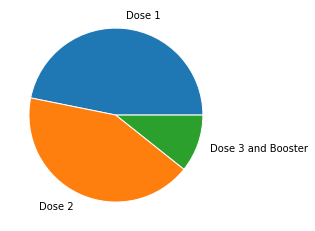

In [21]:
import matplotlib.pyplot as plt

#Dataset for plot
names='Dose 1', 'Dose 2', 'Dose 3 and Booster'
values=[SD1,SD2,SD3B]

plt.pie(values, labels=names, labeldistance=1.15, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' })
print('Cummulative percentge of different Doses out of Total of ', STotal,' vaccinations all over Scotland- ')
print("Dose 1:",SD1, "%")
print("Dose 2:",SD2, "%")
print("Dose 3 and Booster:",SD3B, "%")
plt.show();

In [22]:
#Creating subset for Records for agegroup 12 years and over of all health boards
Daily_12_over= HBDaily[(HBDaily.AgeGroup == '12 years and over') & (HBDaily.HBName != 'Scotland') 
                       & (HBDaily.Sex == 'Total')]

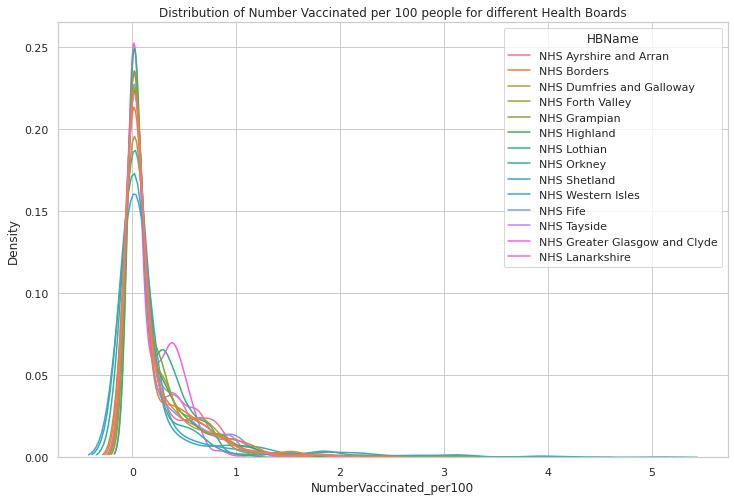

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"]=12,8 #defining size for plot frame

sns.set(style="whitegrid") #setting theme as seaborn whitegrid 

plot=sns.kdeplot(data=Daily_12_over, x="NumberVaccinated_per100", hue="HBName", 
                 fill=False, alpha=0.2)
plot.set_title("Distribution of Number Vaccinated per 100 people for different Health Boards")
plt.show()

Plotting the density distribution of individual frames for better readablity.

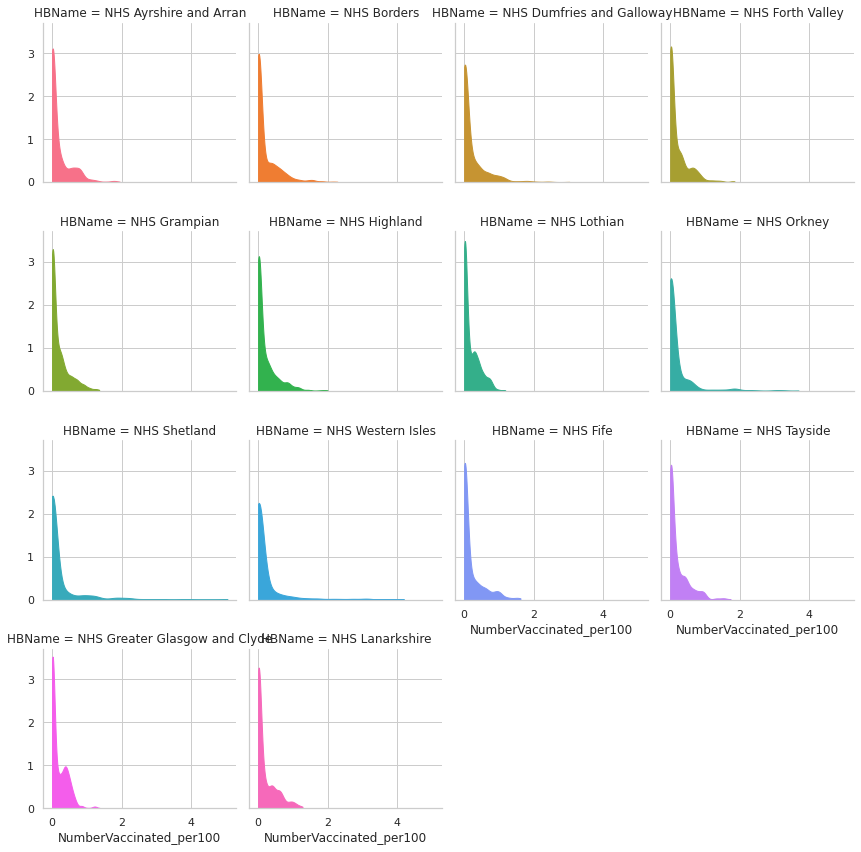

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid") #setting theme as seaborn whitegrid 

plot = sns.FacetGrid(Daily_12_over, col='HBName', hue='HBName', col_wrap=4)
plot = plot.map(sns.kdeplot,"NumberVaccinated_per100", cut=0, fill=True, common_norm=False, alpha=1, legend=False)

plt.show()

Observation: The above 2 plots gives insight to the difference in trends of numberVaccinated per 100 people across different HealthBoards, with 
* NHS Greater Glasgow and Clyde with the highest crest.
* HS Western Isles with the lowest crest crest.

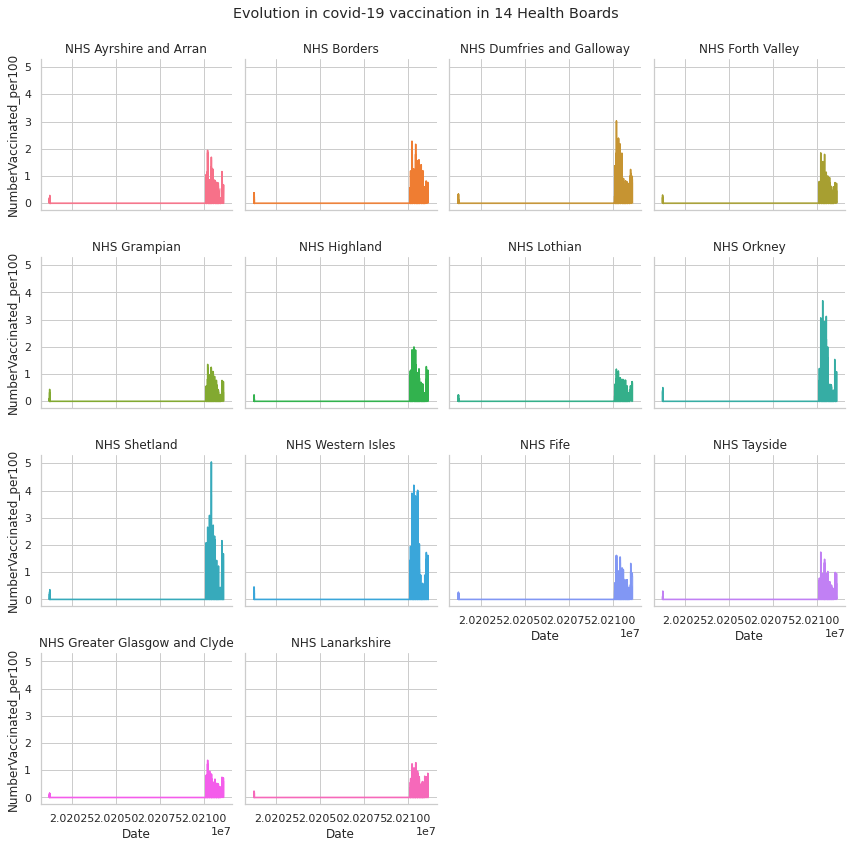

In [26]:
# Creating and initializing a grid 
plot = sns.FacetGrid(Daily_12_over, col='HBName', hue='HBName', col_wrap=4, )

# using plot function to add line over the area   
plot = plot.map(plt.plot, 'Date', 'NumberVaccinated_per100')
 
# using fill_between to Fill the area 
plot = plot.map(plt.fill_between, 'Date', 'NumberVaccinated_per100', alpha=0.2).set_titles("{col_name} HBName")
 
# Controlling the title of each facet
plot = plot.set_titles("{col_name}")
 
# giving a title for the whole plot
plt.subplots_adjust(top=0.92)
plot = plot.fig.suptitle('Evolution in covid-19 vaccination in 14 Health Boards')

# Show the graph
plt.show()

Observation: Lets look into the similarities and distinctions in the vaccination trend across the 14 Health Boards of Scotland.

* Similarities - 
    It is observed that for all 14 Health Boards there is a slight rise in the Number of vaccinations in the very beginning and the there is a consistent dormancy and then again a rise at the end. The trend seen could potentially be attributable to the initial release of the vaccinations starting with people who will carry out the vaccination campaign to care homes, to people aged 70-79 than younger and younger till reaching children aged 12- to 15-year-old. Also, it could be attributable to Lockdown due to new varient, or access of different doses (1st, 2nd 3rd and booster of vaccines.
    
* Differences - There can be a obvious different in heights of NumberVaccinated_per100 people across different health boards. NHS Shetland with the noticable peak, followed by NHS Western Isles and NHS Orkney.

In [27]:
#Creating subset for Lothian Daily Records for agegroup 12 years and over
Lothian= HBDaily[(HBDaily.HBName == 'NHS Lothian') & (HBDaily.Sex != 'Total')]

#Subsets for different Sex
LFemale = Lothian[Lothian['Sex'] == 'Female']
LMale = Lothian[Lothian['Sex'] == 'Male']

#Subsets for different Age groups
LF12_Over = LFemale[LFemale['AgeGroup'] == '12 years and over']
LM12_Over = LMale[LMale['AgeGroup'] == '12 years and over']

LF18_Over = LFemale[LFemale['AgeGroup'] == '18 years and over']
LM18_Over = LMale[LMale['AgeGroup'] == '18 years and over']

LF80_Over = LFemale[LFemale['AgeGroup'] == '80 years and over']
LM80_Over = LMale[LMale['AgeGroup'] == '80 years and over']


In [29]:
#Cummulative Vaccinations for different Age groups
SumF_12_Over= LF12_Over.NumberVaccinated.sum()
SumM_12_Over= LM12_Over.NumberVaccinated.sum()

SumF_18_Over= LF18_Over.NumberVaccinated.sum()
SumM_18_Over= LM18_Over.NumberVaccinated.sum()

SumF_80_Over= LF80_Over.NumberVaccinated.sum()
SumM_80_Over= LM80_Over.NumberVaccinated.sum()

#Cummulative Vaccinations for different Age Bands
LF_12to17=SumF_12_Over-SumF_18_Over
LM_12to17=SumM_12_Over-SumM_18_Over

LF18to79=SumF_18_Over-SumF_80_Over
LM18to79=SumM_18_Over-SumM_80_Over

LF80_over=SumF_80_Over
LM80_over=SumM_80_Over

#clubbing the calculated information into dataframe for easier plotting
d = {'Sex': ['Female','Female','Female','Male','Male','Male'],
     'AgeBand': ['12 to 17 years','18 to 79 years', '80 years and over',
                 '12 to 17 years','18 to 79 years', '80 years and over'], 
     'CummNumberVaccinated': [LF_12to17, LF18to79, LF80_over, LM_12to17,LM18to79,LM80_over]}
df = pd.DataFrame(data=d)
print(df)

      Sex            AgeBand  CummNumberVaccinated
0  Female     12 to 17 years                 19440
1  Female     18 to 79 years                695532
2  Female  80 years and over                 65110
3    Male     12 to 17 years                 19940
4    Male     18 to 79 years                638154
5    Male  80 years and over                 42163


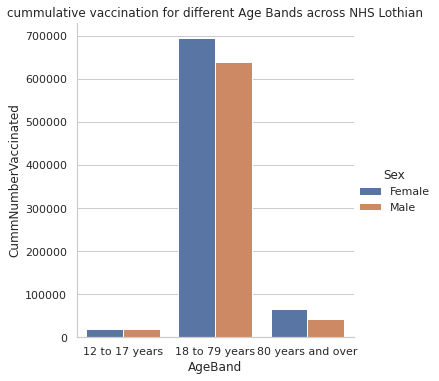

In [30]:
sns.catplot( y="CummNumberVaccinated", x="AgeBand", data=df, kind='bar',hue="Sex").set(title='cummulative vaccination for different Age Bands across NHS Lothian')
plt.show()

Observation: 
* It is noticeable that the cummulative vaccinations received is higher for females than males across majority of age groups. 
* It is worth pondering that could this trend be a possible outcome of possible side effects (like blood clots etc.) of the vaccination observed in the males or maybe just population distribution under Lothian region. 

From the above analysis it can be inferred that the number of vaccinations influenced(varries) by many other factors such as:
* The Region (Here Health Board i.e. HBName)
* Gender (Here Sex)
* Age distributions (here AgeGroup)
* Dose


#### Reflection and Hypothesis : 

Hypothesis 1: Cummulative vaccinations is higher in females than males despite the opposite distribution in population strength because of harmful side effects (like blood clots etc) in males.

* Why - While analysing the vaccination dataset for NHS Lothian, it was observed that cummulative vaccinations is higher in females than males throughout different age groups which makes me ponder if the same trend could be common across other Health Boards as well.

* Testing - A conclusive way to test this hypothesis could be checking for the same trend against the dataset available of the rest of the health boards as well as the dataset for Scotland as whole. This could be combined with checks against the population distribution dataset based on the different agegroups and gender to be more ruleout the the possibilty of the trend due to gender distribution. It would be good to breakdown the age groups into smaller bandwidths than what I tested in this notebook to check against breakouts and outliers.

Hypothesis 2: Varried statistics of NumberVaccinated_per100 across different Health Boards is attributable to the Resource distributions(vaccibation centers) across different health boards.

* why - In the 'Evolution in covid-19 vaccination in 14 Health Boards' plot above, it is a noticeable difference in number of vaccinations per 100 people across different Health Board. Ruling out the varried population distribution as a reason because the plot is based on per 100 people, a next possible factor could be availablity and accessibility of resources across different health boards.

* Testing - 
To test this hypothesis, I would check for the number vaccination centres under each health board and the quantility of vaccinations available against the population density of the corresponding Health boards. Along with this, the location of the centers and its accessibility (easily accessible by what part of that population) can be an indicator of whether easy availability was a contributing factor to higher Number of vaccinations per 100 people. 

Hypothesis 3: Varried statistics of NumberVaccinated_per100 across different Health Boards is attributable to the varrying accessibility authorisations introducted by the government (Eg- age groups, professions like health care providers, and status like internation students) and corresponding population distribution across different health boards.

* Why - In the 'Evolution in covid-19 vaccination in 14 Health Boards' plot above, it is a noticeable difference in number of vaccinations per 100 people across different Health Board. A  possible factor could be that some regions have more people under the section of the popution permitted of vaccinations while the other have less.

* Testing - This hypothesis can be concluded by testing the dataset for smaller timeframes and dividing the timeframes based on recent government decisions regarding allowance of vaccination to certain section of the population like an age group or profession. Then checking the outcome of number of vaccinations per 100 peopld in relation to the population distribution across various regions based on corresponding section permitted. 

Reflection on the Data:

The data I analysed was just one part of a bigger dataset. Vaccination alone had interpretation and significance on its own. When studied in relation to other parts like Number of cases, Death Rate, Hospitalisation etc, this data set could be even more useful and conclusive.
What I learned is that it is easy to draw hypothesis in a smaller subset and validate it by testing it against a bigger dataset. Also, if we draw one hypothesis from a wider grouping of data, there is a good possibility to find outliers or breaking points of the trend as we go on narrowing the groupings.